In [1]:
import tensorflow as tf

# Check if a GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU is available")
else:
    print("GPU is not available")


GPU is available


In [2]:
#imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf


# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC

# Pre-Trained Model
from tensorflow.keras.applications import ResNet50V2, ResNet50, InceptionV3, Xception

In [3]:
# Data
from keras.preprocessing.image import ImageDataGenerator



In [4]:

root_path = r'C:\Users\ASUS\Documents\11_Summer 23\CSE438-Digital Image Processing\Project\Augmentated_Dataset'
# Get class names
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
print(n_classes)

# Calculate class distribution
class_dis = [len(os.listdir(root_path +"\\"+ name)) for name in class_names]

# Show
print(f"Number of Classes : {n_classes}\nClass names : {class_names}")

21
Number of Classes : 21
Class names : ['Actinophrys', 'Arcella', 'Aspidisca', 'Ceratium', 'Codosiga', 'Colpoda', 'Epistylis', 'Euglena', 'Euglypha', 'Gonyaulax', 'Gymnodinium', 'Keratella Quadrala', 'Noctiluca', 'Paramecium', 'Phacus', 'Rotifera', 'Siprostomum', 'Stentor', 'Stylongchia', 'Synchaeta', 'Vorticella']


In [5]:
class_dis

[320,
 320,
 319,
 320,
 320,
 320,
 320,
 320,
 320,
 320,
 320,
 320,
 320,
 320,
 319,
 320,
 320,
 320,
 319,
 360,
 320]

In [6]:
# Pie plot
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()


In [7]:


# Your existing code to calculate class_names and class_dis

fig = px.bar(x=class_names, y=class_dis, title="Class Distribution", color=class_names)
fig.update_layout({'title':{'x':0.45}})
fig.show()

In [8]:
# import os
# from PIL import Image

# root_path = '/content/drive/MyDrive/Augmentated_Dataset/'
# output_path = '/content/drive/MyDrive/GrayScale_Dataset/'

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_path):
#     os.makedirs(output_path)

# # Traverse through the root directory and its subdirectories
# for class_name in os.listdir(root_path):
#     class_dir = os.path.join(root_path, class_name)

#     if os.path.isdir(class_dir):
#         # Create a new directory in the output path for the class
#         output_class_path = os.path.join(output_path, class_name)
#         if not os.path.exists(output_class_path):
#             os.makedirs(output_class_path)

#         # Traverse through the images in the class folder
#         for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)

#             if os.path.isfile(image_path):
#                 # Open the image and convert it to grayscale
#                 image = Image.open(image_path).convert('L')

#                 # Save the grayscale image to the output class folder
#                 output_image_path = os.path.join(output_class_path, image_name)
#                 image.save(output_image_path)
#                 print(f"Processed: {image_path} -> {output_image_path}")


In [9]:
# import os

# root_path = '/content/drive/MyDrive/Augmentated_Dataset/'
# new_path = '/content/drive/MyDrive/Gray_Dataset/'

# # Get a list of class names (subdirectory names) from the root path
# class_names = os.listdir(root_path)

# # Create new directories in the new path using the class names
# for class_name in class_names:
#     # Create a new directory path using the class name
#     new_class_dir = os.path.join(new_path, class_name)

#     # Create the new directory if it doesn't exist
#     if not os.path.exists(new_class_dir):
#         os.makedirs(new_class_dir)
#         print(f"Created directory: {new_class_dir}")
#     else:
#         print(f"Directory already exists: {new_class_dir}")


In [10]:
#COnverting to grayscale

# import os
# from PIL import Image

# root_path = '/content/drive/MyDrive/Augmentated_Dataset/'
# selected_class_name = 'Vorticella'
output_path = '/content/drive/MyDrive/Gray_Dataset/'

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_path):
#     os.makedirs(output_path)

# # Construct the selected class directory path
# selected_class_path = os.path.join(root_path, selected_class_name)

# # Verify that the selected class directory exists
# if os.path.exists(selected_class_path) and os.path.isdir(selected_class_path):
#     output_class_path = os.path.join(output_path, selected_class_name)

#     # Create the output directory for the selected class
#     if not os.path.exists(output_class_path):
#         os.makedirs(output_class_path)

#     # Process images in the selected class directory
#     for image_name in os.listdir(selected_class_path):
#         image_path = os.path.join(selected_class_path, image_name)

#         if os.path.isfile(image_path):
#             # Open the image and convert it to grayscale
#             image = Image.open(image_path).convert('L')

#             # Save the grayscale image to the output class folder
#             output_image_path = os.path.join(output_class_path, image_name)
#             image.save(output_image_path)
#             print(f"Processed: {image_path} -> {output_image_path}")
# else:
#     print(f"Selected class directory '{selected_class_name}' does not exist.")


In [11]:
# Initialize generator
gen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.3,0.8],
    validation_split=0.1

)

In [12]:
# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    batch_size=128, # For better utilization of GPU, I have kept the batch size a little bit
    shuffle=True,
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='training'
)

valid_ds = gen.flow_from_directory(
    root_path,
    batch_size=64, # For faster inference, the batch size here is small.
    shuffle=True,
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='validation'
)

Found 6084 images belonging to 21 classes.
Found 673 images belonging to 21 classes.


In [13]:
# def show_images(data, GRID=[3, 7], model=None, size=(25, 10)):


#     # The plotting configurations
#     n_rows, n_cols = GRID
#     n_images = n_rows * n_cols
#     plt.figure(figsize=size)

#     # Data for visualization
#     images, labels = next(iter(data)) # This process can take a little time because of the large batch size

#     # Iterate through the subplots.
#     for i in range(1, n_images+1):

#         # Select a random data
#         id = np.random.randint(len(images)) # This is a dynamic function because for validation data and training data, the length of total images is different.
#         image, label = images[id], class_names[int(labels[id])]

#         # Plot the sub plot
#         plt.subplot(n_rows, n_cols, i)
#         plt.imshow(image)
#         plt.axis('off')

#         # If model is available make predictions.
#         if model is not None:
#             pred = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
#             title = f"Class : {label}\nPred : {pred}"
#         else:
#             title = f"Class : {label}"

#         plt.title(title)
#     plt.show()

In [14]:
def show_images(data, GRID=[3, 7], model=None, size=(25, 10)):
    # The plotting configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=size)

    # Data for visualization
    images, labels = next(iter(data))

    # Prepare a list of unique class indices
    unique_classes = np.unique(labels)
    np.random.shuffle(unique_classes)

    idx_counter = 0  # To keep track of the current class index

    # Iterate through the subplots.
    for i in range(1, n_images + 1):
        # Select data for the current class
        class_idx = unique_classes[idx_counter]
        class_indices = np.where(labels == class_idx)[0]
        image_idx = np.random.choice(class_indices)

        image, label = images[image_idx], class_names[int(labels[image_idx])]

        # Plot the subplot
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        plt.axis('off')

        # If model is available, make predictions.
        if model is not None:
            pred = class_names[np.argmax(model.predict(image[np.newaxis, ...]))]
            title = f"Class : {label}\nPred : {pred}"
        else:
            title = f"Class : {label}"

        plt.title(title)

        # Increment class index counter
        idx_counter = (idx_counter + 1) % len(unique_classes)

    plt.show()

# # Call the function
# show_images(data, GRID=[3, 7], model=None, size=(25, 10))


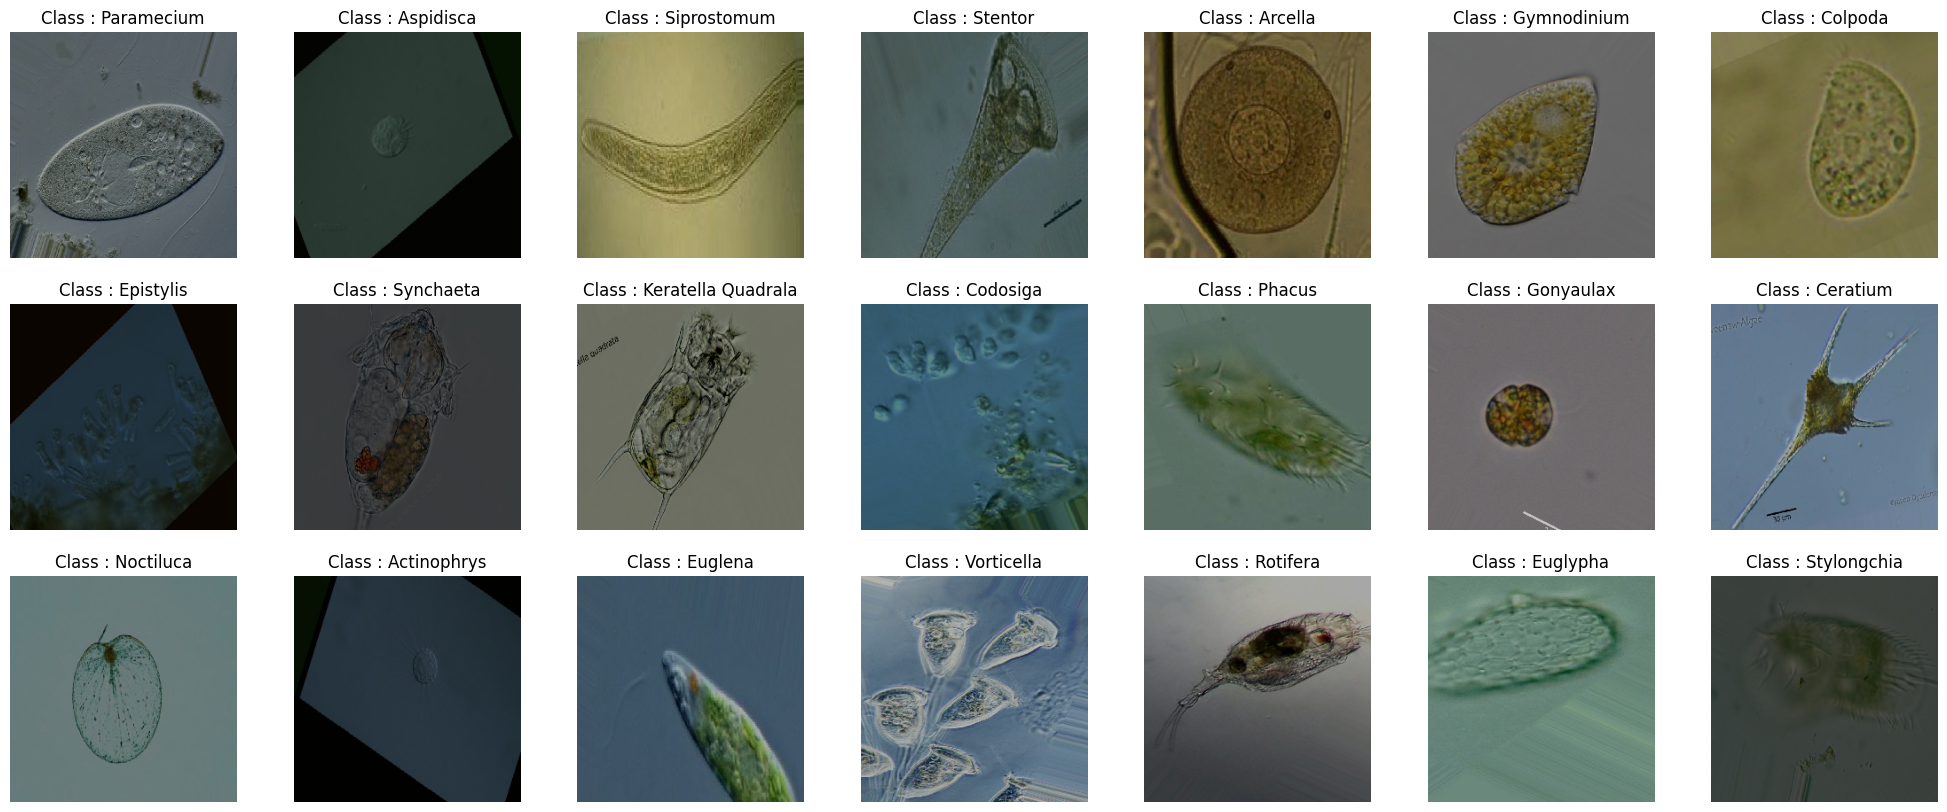

In [15]:
show_images(data=train_ds)

In [16]:
# # Give you a model, a name
# name = "inception-v3"

# # Base model
# base = InceptionV3(input_shape=(256,256,3), include_top=False)
# base.trainable = False

# # Model Architecture
# model = Sequential([
#     base, GAP(),
#     Dense(256, kernel_initializer='he_normal', activation='relu'),
#     Dropout(0.2),
#     Dense(n_classes, activation='softmax')
# ])

# # Callbacks
# cbs = [ES(patience=3, restore_best_weights=True), MC(name + ".h5", save_best_only=True)]

# # Compile Model
# opt = tf.keras.optimizers.Adam(learning_rate=1e-3) # Higher than the default learning rate
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# # Training
# history = model.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=cbs)

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

NameError: name 'history' is not defined

In [ ]:
show_images(data=valid_ds, model=model)


In [ ]:
#VGG16
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the pretrained VGG16 model without the classification layers
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

# Build your model on top of the base model
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

# Train the model
vgghist = model.fit(train_ds, steps_per_epoch=100, epochs=10, validation_data=valid_ds)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the pretrained VGG19 model without the classification layers
base_model = VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

# Build your model on top of the base model
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

# Train the model
vgghist = model.fit(train_ds, steps_per_epoch=100, epochs=10, validation_data=valid_ds)


In [19]:

from tensorflow.keras.applications import ResNet50


# Load the pretrained ResNet50 model without the classification layers
base_model = ResNet50(input_shape=(256, 256, 3), include_top=False)


# Add your own classification layers on top of the base model
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(512, activation='relu')(x)
# x = Dense(256, activation='relu')(x)
# output = Dense(1, activation='softmax')(x)  # Replace num_classes with your number of classes

# model = Model(inputs=base_model.input, outputs=output)



model = Sequential([
    base_model, GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])

# # Train the model
# history = model.fit(train_ds,  epochs=10, validation_data=valid_ds)



# Callbacks
cbs = [ES(patience=3, restore_best_weights=True), MC("model.h5", save_best_only=True)]

# Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=0.01) # Higher than the default learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training
history = model.fit(train_ds, validation_data=valid_ds, epochs=20, callbacks=cbs)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/resnet50/conv1_bn/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_21744\1524958556.py", line 40, in <module>
      history = model.fit(train_ds, validation_data=valid_ds, epochs=20, callbacks=cbs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_1/resnet50/conv1_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[128,128,128,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/resnet50/conv1_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_29423]

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pretrained ResNet50 model with reduced input shape
base_model = ResNet50(input_shape=(128, 128, 3), include_top=False)

n_classes = 21  # Replace with the actual number of classes

model = Sequential([
    base_model, GlobalAveragePooling2D(),
    Dense(128, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)  # Higher than the default learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training with less frequent callbacks
callbacks = [EarlyStopping(patience=2, restore_best_weights=True)]
history = model.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=callbacks)

# Save the model
model.save("light_model.h5")


Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_2/resnet50/conv1_conv/Conv2D' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_21744\3761855753.py", line 25, in <module>
      history = model.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=callbacks)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_2/resnet50/conv1_conv/Conv2D'
OOM when allocating tensor with shape[128,128,128,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_2/resnet50/conv1_conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_44134]